<a href="https://colab.research.google.com/github/brianosmith/EXSY_fitting_notebook/blob/master/Saturation_curves_for_ligand_binding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Saturation curves for ligand binding

Goal is to produce a tool to calculate e.g. [L] required for a set fractional saturation at a known [M] or vice versa.

First simulate Y and plot it

$
Y = \frac{([M_{tot}] + [L_{tot}] + K_d) \pm \sqrt{([M_{tot}] + [L_{tot}] + K_d)^2 - 4[M_{tot}][L_{tot}]} }{ 2[M_{tot}]}
$

which is typically going to subtract the positive root of the square root from the sum.

In [2]:
# sqrt is in the math package and has to be imported
from math import sqrt

# some values to calculate with
M = 0.5
Kd = 0.15
L = 0.125

# careful placement of brackets required to get the correct evaluation order
# x**y to raise a value to a power

Y = ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)

print(Y)

0.1828640358836494


Lookup: [L], Y... [[0.1, 0.26794919243112253], [0.19, 0.4245370899470907], [0.28, 0.5314561435345977], [0.37, 0.6072823696195045], [0.45999999999999996, 0.6631225717283756], [0.5499999999999999, 0.7056382803105438], [0.64, 0.7389395359323281], [0.73, 0.7656528422124237], [0.82, 0.7875162337936142], [0.9099999999999999, 0.8057173989190858], [1.0, 0.8210916541997271]]


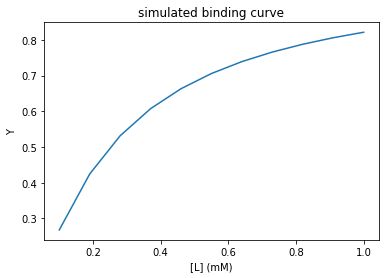

In [ ]:
# for drawing the graph
%matplotlib inline
import matplotlib.pyplot as plt
# math function as above
from math import sqrt
# for creating the L values over which to sample the function. Would also be nice to capture the results in a more sophisticated array.
import numpy as np

M = 0.1
Kd = 0.2

Llow = 0.1
Lhigh = 1.0
nL = 11

Lval = np.linspace(Llow, Lhigh, nL)

Yval = []
Lookup = [] # could be np.array()
for L in Lval:
  Y = ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)
  Yval.append(Y)
  Lookup.append([L,Y])

# crude numerical output - should be formatted better
print("Lookup: [L], Y...", Lookup)

#plot the results
plt.title("simulated binding curve")
plt.xlabel('[L] (mM)')
plt.ylabel('Y')
plt.plot(Lval,Yval, label='Y')
#plt.legend()



can we make an equation solver to give us [L] using sympy?

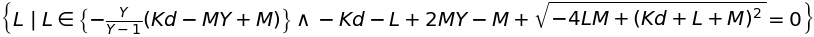

In [ ]:
from sympy import *
Y, M, L, Kd = symbols('Y M L Kd')
init_printing(use_unicode=True)

Eq(Y, ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M))

solveset(Eq(Y, ((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)), L)


can we now solve for L for particular values of Y, M & Kd?

In [ ]:
#still using sympy and the symbols imported and defined above
fracSat = (((M + L + Kd) - sqrt((M + L + Kd)**2 - (4 * M * L)))/(2 * M)) - Y

newFracSat=fracSat.subs([(Y, 0.5), (M, 0.25), (Kd, 0.18)])

solveset(newFracSat, L)

# Simulated response curve for a titration
In the case that a titration is performed experimentally, it is often the case that the sample is constructed with one partner (often the protein) alone and the other partner (often a small molecule) is increased in concentration by successive addition of material from a concentrated stock solution. In this case, the total volume of the sample will increase with the consequence that the concentration of the initial partner is not constant. Unless the change in volume is very small, this should be accounted for to get be able to fit the data accurately.

Where the availability of material is not limiting, it is good practice to construct a series of samples with the non-varied partner always present at the same concentration.

Alternatively, where the availability of material is limiting, it is good practice to start with two samples of equal volume containing equal concentrations of the non-varied partner and concentrations of the varied partner at the extremes of the range to be explored. Intermediate points are then constructed by successively exchanging volumes between the two samples. The concentration of the non-varied partner is this kept constant.

To account for the first case, where the total volume is varied, the volume can be expressed in terms of ligand concentration

$
v_t = v_0 \times \frac {[L_{s}]}{[L_{s}]-[L_{tot}]}
$

where $[L_{s}]$ is the ligand (varied partner) stock concentration and the macromolecule (non-varied partner) concentration is therefore

$
[M_{tot}] = [M_0] \times v_0/v_t = [M_0] (1 - [L_{tot}]/[L_{s}] )
$

Where $[M_0]$ is the initial macromolecule concentration. So, the response curve can be expressed as follows

$
Y = \frac{([M_0](1 - [L_{tot}]/[L_{s}]) + [L_{tot}] + K_d) \pm \sqrt{([M_0](1 - [L_{tot}]/[L_{s}] + [L_{tot}] + K_d)^2 - 4[M_0](1 - [L_{tot}]/[L_{s}][L_{tot}]} }{ 2[M_0](1 - [L_{tot}]/[L_{s}]}
$



In [4]:
# some values to calculate with
M0 = 0.5
Kd = 0.15
L = 0.125
Ls = 10.0

# careful placement of brackets required to get the correct evaluation order
# x**y to raise a value to a power

Y = ((M0*(1-(L/Ls)) + L + Kd) - sqrt((M0*(1-(L/Ls)) + L + Kd)**2 - (4 * M0*(1-(L/Ls)) * L)))/(2 * M0*(1-(L/Ls)))

print(Y)

0.18445396772899691


Lookup: [L], Y... [[0.001, 0.0033260445416909657], [0.01099, 0.0357621888972918], [0.020980000000000002, 0.0667929692119803], [0.030970000000000004, 0.09646667574107139], [0.04096, 0.12483305320183218], [0.05095, 0.15194276256703357], [0.06094000000000001, 0.17784689005911342], [0.07093, 0.2025965080994493], [0.08092, 0.2262422904963959], [0.09091, 0.2488341820568926], [0.1009, 0.2704211211141945], [0.11089, 0.2910508121775365], [0.12088000000000002, 0.3107695450010561], [0.13087000000000001, 0.32962205579507103], [0.14086, 0.34765142600988597], [0.15085, 0.3648990140554766], [0.16084, 0.3814044154264474], [0.17083, 0.3972054469326023], [0.18082, 0.41233815104995947], [0.19081, 0.42683681677106644], [0.2008, 0.4407340137201978], [0.21079, 0.4540606366880387], [0.22078, 0.4668459581171774], [0.23077, 0.47911768642415803], [0.24076000000000003, 0.49090202836984326], [0.25075000000000003, 0.5022237539842168], [0.26074, 0.5131062628133873], [0.27073, 0.5235716504860751], [0.28072, 0.533640

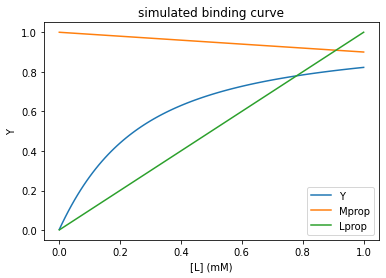

In [10]:
# for drawing the graph
%matplotlib inline
import matplotlib.pyplot as plt
# math function as above
from math import sqrt
# for creating the L values over which to sample the function. Would also be nice to capture the results in a more sophisticated array.
import numpy as np

M0 = 0.1
Kd = 0.2

Ls = 10.0
Llow = 0.001
Lhigh = 1.0
nL = 101

Lval = np.linspace(Llow, Lhigh, nL)

Yval = []
Mprop = []
Lprop = []
Lookup = [] # could be np.array()
for L in Lval:
  Y = ((M0*(1-(L/Ls)) + L + Kd) - sqrt((M0*(1-(L/Ls)) + L + Kd)**2 - (4 * M0*(1-(L/Ls)) * L)))/(2 * M0*(1-(L/Ls)))
  Yval.append(Y)
  Mprop.append((1-(L/Ls)))
  Lprop.append(L/Lhigh)
  Lookup.append([L,Y])

# crude numerical output - should be formatted better
print("Lookup: [L], Y...", Lookup)

#plot the results
plt.title("simulated binding curve")
plt.xlabel('[L] (mM)')
plt.ylabel('Y')
plt.plot(Lval,Yval, label='Y')
plt.plot(Lval,Mprop, label='Mprop')
plt.plot(Lval,Lprop, label='Lprop')
plt.legend()

